In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 16})
#plt.rcParams['figure.figsize'] = [18, 8]
import seaborn as sns
from matplotlib import patheffects
#import folium
#import networkx as nx
import json
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
#from IPython.display import display
#import scipy.stats
import geopandas as gpd
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#africa = world.loc[world['continent'] == 'Africa']
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read the datasets

In [ ]:
# Read the food production data
food_prod = pd.read_csv('/content/africa_food_production.csv')

# Read the food supply data
food_supply = pd.read_csv('/content/africa_food_supply.csv')

## Food Production dataset

In [ ]:
print(food_prod.shape)
food_prod.head()

(23110, 4)


,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [ ]:
# check data information
food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [ ]:
# Check for missing values
food_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [ ]:
# Checking for number of unique features
food_prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [ ]:
# Summary statistics for food production data
food_prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


Converting the `Year` column of the `africa_food_production.csv` and `africa_food_supply.csv` datasets to an ordered categorical column can help  create better visualizations, perform better analysis, and prevent errors in analysis.

In [ ]:
# Converting the 'Year' column to an ordered categorical column
food_prod['Year'] = food_prod['Year'].astype('category')
food_prod['Year'] = food_prod['Year'].cat.reorder_categories(range(2004, 2014), ordered=True)

food_supply['Year'] = food_supply['Year'].astype('category')
food_supply['Year'] = food_supply['Year'].cat.reorder_categories(range(2004, 2014), ordered=True)

In [ ]:
# # Transform food production data
# food_prod['Year'] = pd.to_datetime(food_prod['Year'], format='%Y')
# food_prod.iloc[:, 3:] *= 1000
# food_prod.set_index(['Country', 'Year'], inplace=True)

### Exploratory Data Analysis for Food production dataset

To build a compelling narrative on how the world food shortage problem can be solved using the provided datasets, we can perform exploratory data analysis and visualization.

# What is the trend over time of food production in Africa?

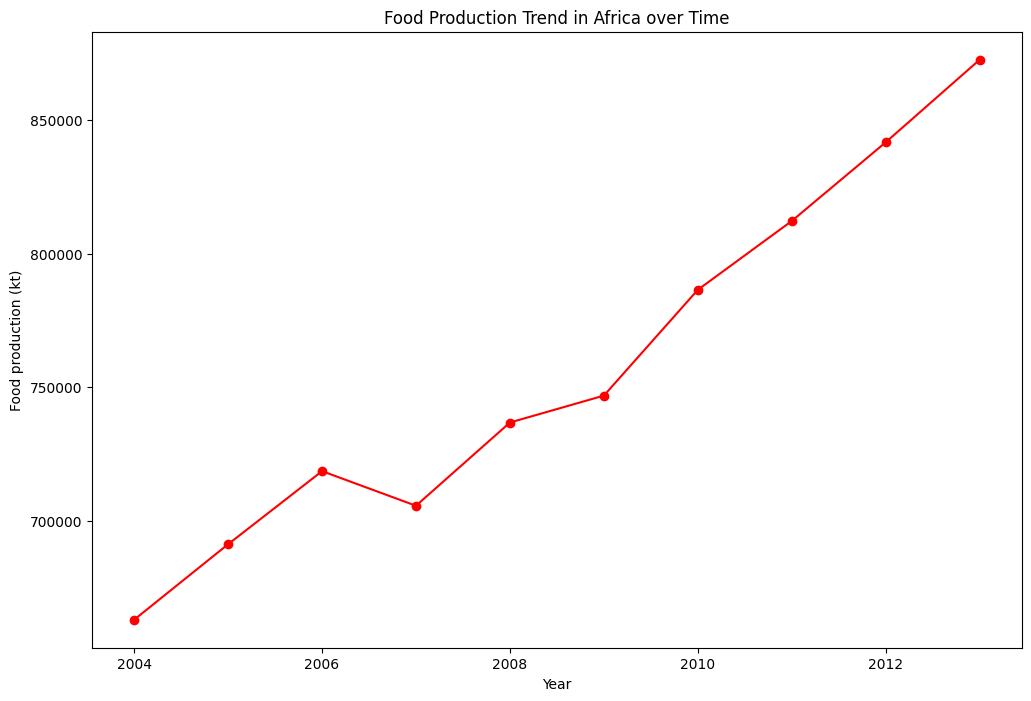

In [ ]:
# Visualize food production over time
plt.figure(figsize=(12, 8))
prod_trend = food_prod.groupby('Year')['Value'].sum()
prod_trend.plot(kind='line', marker='o', color='red', title='Food Production Trend in Africa over Time')
plt.xlabel('Year')
plt.ylabel('Food production (kt)')
plt.show()

In [ ]:
prod_trend

Year
2004    663006
2005    691257
2006    718602
2007    705659
2008    736804
2009    746870
2010    786466
2011    812214
2012    841667
2013    872571
Name: Value, dtype: int64

In [ ]:
# Group the production data by country by year
prod_by_country = food_prod.groupby(['Country', 'Year'])
prod_by_country.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
22515,Zimbabwe,Oats,2009,1
22516,Zimbabwe,Oats,2010,1
22517,Zimbabwe,Oats,2011,1
22518,Zimbabwe,Oats,2012,1


In [ ]:
# Group the production data by country by year
prod_by_country = food_prod.groupby(['Country', 'Year'])
prod_by_country.first()

Item  Value
Country  Year                           
Algeria  2004  Wheat and products   2731
         2005  Wheat and products   2415
         2006  Wheat and products   2688
         2007  Wheat and products   2319
         2008  Wheat and products   1111
...                           ...    ...
Zimbabwe 2009  Wheat and products     12
         2010  Wheat and products     18
         2011  Wheat and products     23
         2012  Wheat and products     20
         2013  Wheat and products     25

[450 rows x 2 columns]

In [ ]:
# Group the production data by country
prod_by_country = food_prod.groupby('Country')['Value'].sum()

prod_by_country_sorted = pd.DataFrame({
    'Country': prod_by_country.index,
    'Total Production': prod_by_country.values}).sort_values(
        by='Total Production', ascending=False)
prod_by_country_sorted

,Country,Total Production
31,Nigeria,1628030
12,Egypt,877498
36,South Africa,579592
13,Ethiopia,350693
42,United Republic of Tanzania,332802
37,Sudan,301584
16,Ghana,295004
41,Uganda,278421
27,Morocco,271821
19,Kenya,256872


In [ ]:
# Group the production data by country by year
prod_by_year = food_prod.groupby(['Country', 'Year'])['Value'].sum()
prod_by_year

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
                  ...  
Zimbabwe  2009     5754
          2010     6777
          2011     7551
          2012     8173
          2013     7914
Name: Value, Length: 450, dtype: int64

# What is the trend over time of food production in Africa?

Top 10 countries in food production:
 Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Name: Value, dtype: int64


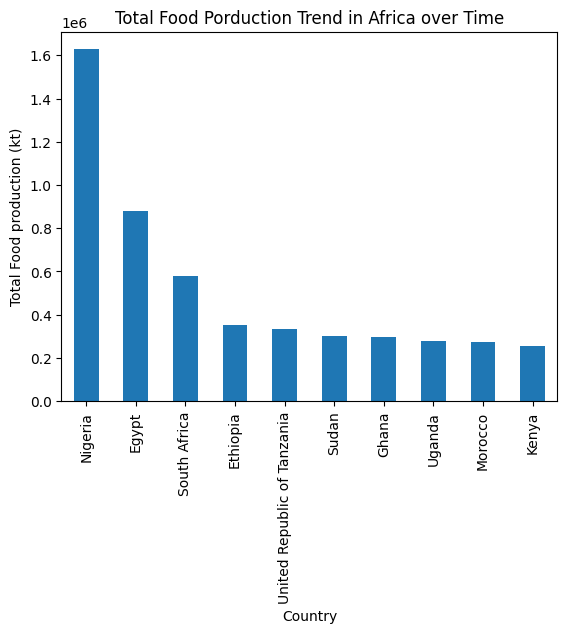

In [ ]:
# What countries produced the most (top 10) and least food?
top10_countries = food_prod.groupby('Country')['Value'].sum().nlargest(10)
print('Top 10 countries in food production:\n', top10_countries)

# Plot the bar chart of Top 10 countries over time
top10_countries.plot(kind='bar', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food production (kt)')
plt.show()

This plot shows the total food production by country. It helps us identify countries with high or low production levels. The top five countries with the highest production levels are `Nigeria`, `Egypt`, `South Africa` `Ethiopia` and `Tanzania`. On the other hand, `Djibouti`, `Sao Tome and Principe` and `Cabo Verde` has the lowest production levels.

In [ ]:
# Create a dictionary that maps each top 5 country to its corresponding value
country_to_value = dict(zip(food_prod['Country'], food_prod['Value']))

# Creating a choropleth map of Top 5 Food Producing Countries in Africa
fig = px.choropleth(
    locations=["Nigeria", "Egypt", "South Africa", "Ethiopia", "United Republic of Tanzania"],
    locationmode="country names",
    scope='africa',
    color=[country_to_value[country] for country in ["Nigeria", "Egypt", "South Africa", "Ethiopia", "United Republic of Tanzania"]],
    title='Top 5 Food Producing Countries in Africa')

# Show the figure
fig.show()

## Which countries produced the least food?

Least 10 countries in food production:
 Country
Djibouti                   666
Sao Tome and Principe     1152
Cabo Verde                1658
Lesotho                   3785
Gambia                    4699
Botswana                  4808
Guinea-Bissau             7296
Mauritania               10039
Gabon                    13566
Namibia                  14197
Name: Value, dtype: int64


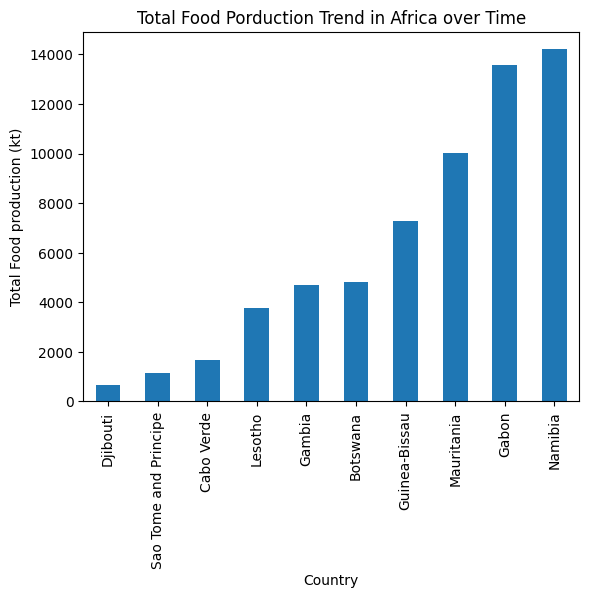

In [ ]:
least_countries = food_prod.groupby('Country')['Value'].sum().nsmallest(10)
print('Least 10 countries in food production:\n', least_countries)

# Plot the bar chart of Least 10 countries over time
least_countries.plot(kind='bar', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food production (kt)')
plt.show()

### Food production by crop category

In [ ]:
# Group the production data by crop category
prod_by_category = food_prod.groupby('Item')['Value'].sum()

prod_by_category_sorted = pd.DataFrame({
    'Item': prod_by_category.index,
    'Total Production': prod_by_category.values}).sort_values(
        by='Total Production', ascending=False)
prod_by_category_sorted.set_index('Item', inplace=True)
prod_by_category_sorted

,Total Production
Item,
Cassava and products,1118948
Sugar cane,887008
Maize and products,574948
Yams,511523
"Vegetables, Other",410403
...,...
Cloves,249
"Molluscs, Other",214
Pepper,199


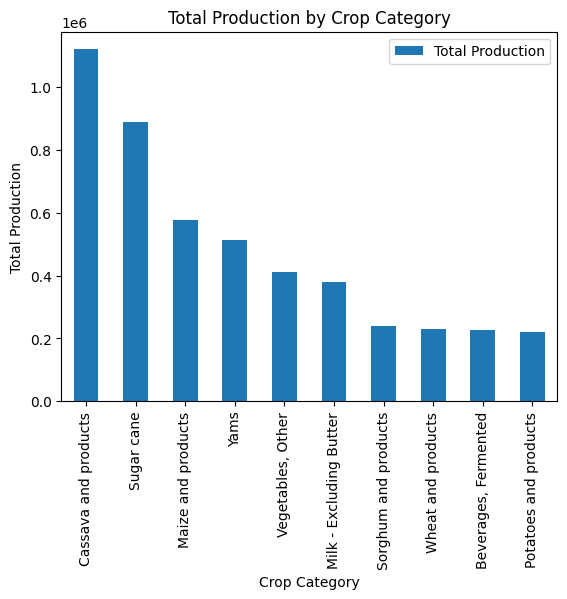

In [ ]:
# Plot the top 20 food production by crop category
top_10_crops = prod_by_category_sorted.head(10)
top_10_crops.plot(
    kind="bar",
    xlabel="Crop Category",
    ylabel="Total Production",
    title="Total Production by Crop Category"
)
plt.xticks(rotation=90)
plt.show();

## What food products were produced the most?

Top 10 food products produced:
 Item
Cassava and products       1118948
Sugar cane                  887008
Maize and products          574948
Yams                        511523
Vegetables, Other           410403
Milk - Excluding Butter     380380
Sorghum and products        241080
Wheat and products          229875
Beverages, Fermented        227037
Potatoes and products       221092
Name: Value, dtype: int64


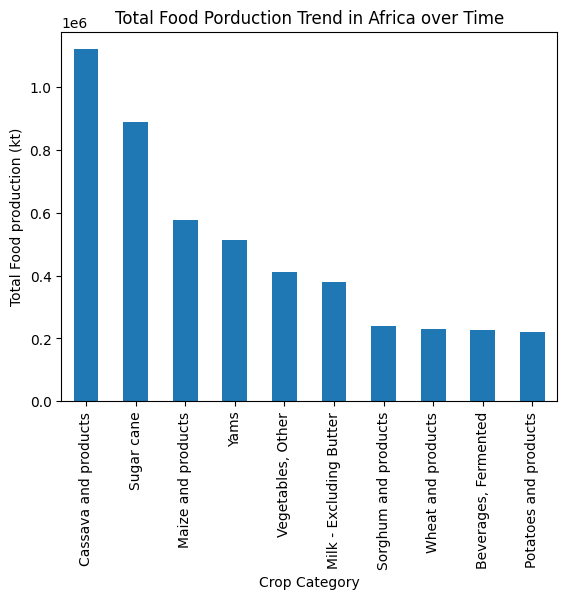

In [ ]:
# What food products were produced the most? (top 10)
top10_products = food_prod.groupby('Item')['Value'].sum().nlargest(10)
print('Top 10 food products produced:\n', top10_products)

# Plot the bar chart of Least 10 countries over time
top10_products.plot(kind='bar', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Crop Category')
plt.ylabel('Total Food production (kt)')
plt.show()

## What food products were the least produced?

Least produced food products:
 Item
Aquatic Animals, Others     13
Fish, Liver Oil             28
Pepper                     199
Molluscs, Other            214
Cloves                     249
Fish, Body Oil             403
Cream                      413
Rape and Mustard Oil       437
Sugar non-centrifugal      686
Rye and products           846
Name: Value, dtype: int64


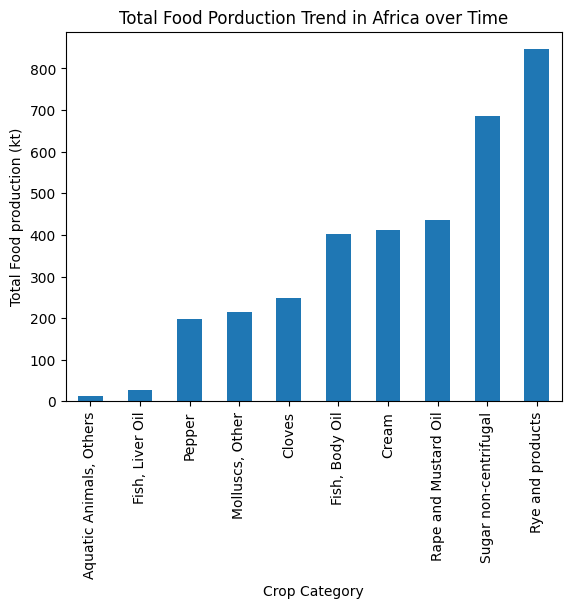

In [ ]:
least_products = food_prod.groupby('Item')['Value'].sum().nsmallest(10)
print('Least produced food products:\n', least_products)

# Plot the bar chart of Least 10 countries over time
least_products.plot(kind='bar', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Crop Category')
plt.ylabel('Total Food production (kt)')
plt.show()

In [ ]:
# Do we have outlier countries in food production data between 2004 and 2013?
outliers = food_prod[(food_prod['Year'] >= 2004) & (food_prod['Year'] <= 2013)].groupby('Country')['Value'].sum().nlargest(5)
print('Outlier countries in food production data between 2004 and 2013:\n', outliers)

Outlier countries in food production data between 2004 and 2013:
 Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Name: Value, dtype: int64


In [ ]:
# Load the African countries GeoJSON file
african_countries = json.load(open("african_countries.geojson"))

# Create a chloropleth map of African countries
fig = px.choropleth(
    food_prod,
    geojson=african_countries,
    locations=food_prod["Country"],
    locationmode='country names',
    color=food_prod['Value'],
    scope='africa',
    hover_name=food_prod['Country'],
    #title="Food Production in Africa by Country and Year",
    color_continuous_midpoint=500,
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame=food_prod['Year'],
    #center={'lat': 7.1881, 'lon': 21.0938},
    width=600,   # Width of map
    height=600,   # Height of map

)

fig.update_layout(title='Food Production in Africa by Country and Year',
                  margin={'l': 0, 'r': 0, 't': 50, 'b': 0})

# Display the map
fig.show()

## Which country produced the highest amount of oats in 2010?

In [ ]:
# Filtering the data for oats and the year 2010
top_oats = food_prod[(food_prod['Item'] == 'Oats') & (food_prod['Year'] == 2010)]

# Finding the country with the highest oat production
max_production = top_oats.loc[top_oats['Value'].idxmax()]
print('The country with the highest oat production')
print(max_production['Country'])

The country with the highest oat production
Algeria


### Food Supply


In [ ]:
food_supply.head(10)

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
5,Algeria,2009,3110
6,Algeria,2010,3142
7,Algeria,2011,3217
8,Algeria,2012,3272
9,Algeria,2013,3296


In [ ]:
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  450 non-null    object  
 1   Year     450 non-null    category
 2   Value    450 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 7.7+ KB


In [ ]:
# Check for number of unique values
food_supply.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [ ]:
# Summary statistics for food supply
food_supply.describe()

,Value
count,450.000000
mean,2469.775556
std,379.140143
min,1781.000000
25%,2174.000000
50%,2376.000000
75%,2681.750000
max,3561.000000


In [ ]:
# summary statistics for 2012
food_supply.query('Year == 2012')['Value'].describe()

count      45.000000
mean     2527.644444
std       388.466926
min      1923.000000
25%      2200.000000
50%      2414.000000
75%      2707.000000
max      3561.000000
Name: Value, dtype: float64

## What is the trend over time of food supply in Africa?

In [ ]:
# Group by Country
supply_trend = food_supply.groupby(['Country', 'Year'])
supply_trend.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [ ]:
# Group by Country and Year
supply_trend = food_supply.groupby(['Country', 'Year'])['Value'].sum()
supply_trend

Country   Year
Algeria   2004    2987
          2005    2958
          2006    3047
          2007    3041
          2008    3048
                  ... 
Zimbabwe  2009    2147
          2010    2168
          2011    2200
          2012    2197
          2013    2110
Name: Value, Length: 450, dtype: int64

In [ ]:
# Group by Country and Year
supply_trend = food_supply.groupby(['Country', 'Year'])
supply_trend.first()

Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]

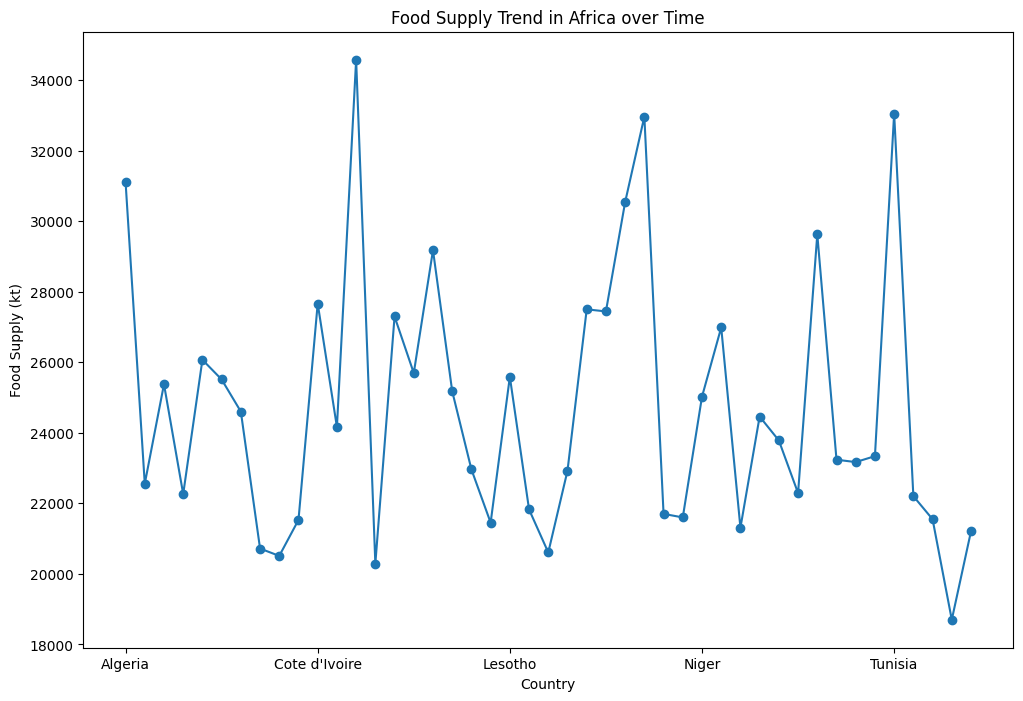

In [ ]:
# Group by Country
plt.figure(figsize=(12, 8))
supply_trend = food_supply.groupby('Country')['Value'].sum()
supply_trend.plot(kind='line', marker='o', title='Food Supply Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Food Supply (kt)')
plt.show()

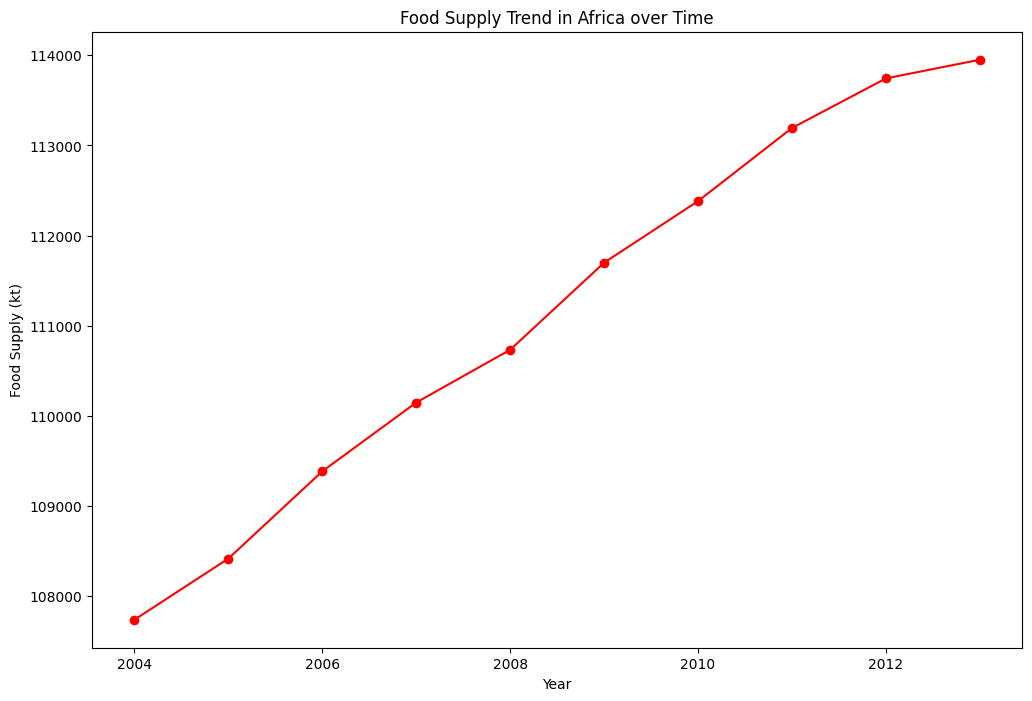

In [ ]:
# Visualize the food supply over time
plt.figure(figsize=(12, 8))
supply_trend = food_supply.groupby('Year')['Value'].sum()
supply_trend.plot(kind='line', marker='o', color='red', title='Food Supply Trend in Africa over Time')
plt.xlabel('Year')
plt.ylabel('Food Supply (kt)')
plt.show()

## What countries had the most food supply?

In [ ]:
# Sorting the dataset by food supply in descending order
food_supply_sorted = food_supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False)
food_supply_sorted

Country
Egypt                          34580
Tunisia                        33055
Morocco                        32967
Algeria                        31118
Mauritius                      30543
South Africa                   29629
Ghana                          29180
Cote d'Ivoire                  27666
Mali                           27502
Mauritania                     27443
Gabon                          27299
Nigeria                        26988
Burkina Faso                   26072
Gambia                         25695
Lesotho                        25588
Cabo Verde                     25514
Benin                          25378
Guinea                         25180
Niger                          25024
Cameroon                       24603
Sao Tome and Principe          24462
Djibouti                       24165
Senegal                        23784
Togo                           23339
Sudan                          23238
Swaziland                      23171
Guinea-Bissau                 

Top 10 Food Items supplied:
 Country
Egypt            34580
Tunisia          33055
Morocco          32967
Algeria          31118
Mauritius        30543
South Africa     29629
Ghana            29180
Cote d'Ivoire    27666
Mali             27502
Mauritania       27443
Name: Value, dtype: int64


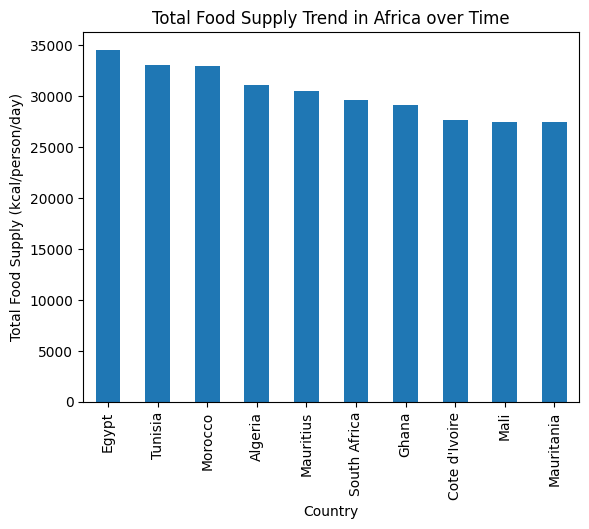

In [ ]:
# What food products were supplied the most?
top10_food_supply = food_supply_sorted.head(10)
print('Top 10 Food Items supplied:\n', top10_food_supply)

# Plot the bar chart of Least 10 countries over time
top10_food_supply.plot(kind='bar', title='Total Food Supply Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food Supply (kcal/person/day)')
plt.show()

## What countries had the least food supply?

Least 10 Food Items supplied:
 Country
United Republic of Tanzania    21550
Congo                          21530
Kenya                          21453
Rwanda                         21309
Zimbabwe                       21209
Central African Republic       20719
Madagascar                     20608
Chad                           20511
Ethiopia                       20292
Zambia                         18701
Name: Value, dtype: int64


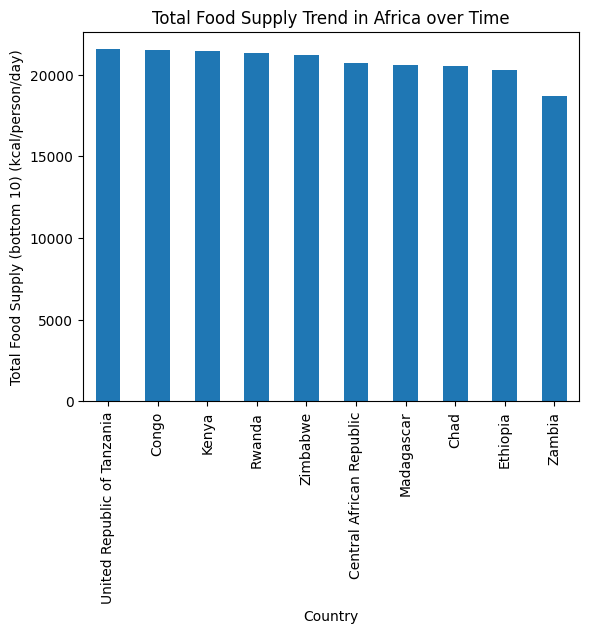

In [ ]:
# Creating a bar chart of the bottom 10 countries with the lowest food supply
# What food products were supplied the most? (top 10)
bottom_10 = food_supply_sorted.tail(10)
print('Least 10 Food Items supplied:\n', bottom_10)

# Plot the bar chart of Least 10 countries over time
bottom_10.plot(kind='bar', title='Total Food Supply Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food Supply (bottom 10) (kcal/person/day)')
plt.show()

In [ ]:
# Load the African countries GeoJSON file
african_countries = json.load(open("african_countries.geojson"))

# Create a chloropleth map of African countries
fig = px.choropleth(
    food_supply,
    geojson=african_countries,
    locations=food_supply["Country"],
    locationmode='country names',
    color=food_supply['Value'],
    hover_name=food_supply['Country'],
    scope='africa',
    #title="Food Supply in Africa by Country and Year",
    color_continuous_midpoint=500,
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame=food_supply['Year'],
    center={'lat': 7.1881, 'lon': 21.0938},
    width=600,   # Width of map
    height=600,   # Height of map

)

fig.update_layout(title='Food Supply in Africa by Country and Year',
                  margin={'l': 0, 'r': 0, 't': 50, 'b': 0})

# Display the map
fig.show()

In [ ]:
# visualizing the food supply with plotly(Animation plot)

fig = px.scatter(food_supply,
             x ="Country",
             y ="Value",
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Food Supply in Africa by Country',
             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})

fig.show()

## Which three countries had the lowest supply between 2004 and 2006 respectively (inclusive)?

In [ ]:
# Filtering the data for the years 2004 to 2006 (inclusive)
filtered_data = food_supply[(food_supply['Year'] >= 2004) & (food_supply['Year'] <= 2006)]

# Grouping the data by country and calculating the average food supply
grouped_data = filtered_data.groupby('Country')['Value'].mean().reset_index()

# Sorting the data by food supply in ascending order and selecting the first three rows
lowest_supply = grouped_data.sort_values(by='Value', ascending=True).head(3)

# Displaying the countries with the lowest food supply
print('Three Countries with the lowest supply between 2004and 2006')
print(lowest_supply['Country'])

Three Countries with the lowest supply between 2004and 2006
43                      Zambia
13                    Ethiopia
7     Central African Republic
Name: Country, dtype: object


## Detecting Outliers in Food Supply
Do we have any outliers in food supply?

In [ ]:
food_supply_boxplot = px.box(data_frame=food_supply,
                             x='Year',
                             y='Value',
                             color='Year',
                             title='Box Plot for Food Supply Per Year',
                             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
food_supply_boxplot.show()

## Trends in food production and supply over the years

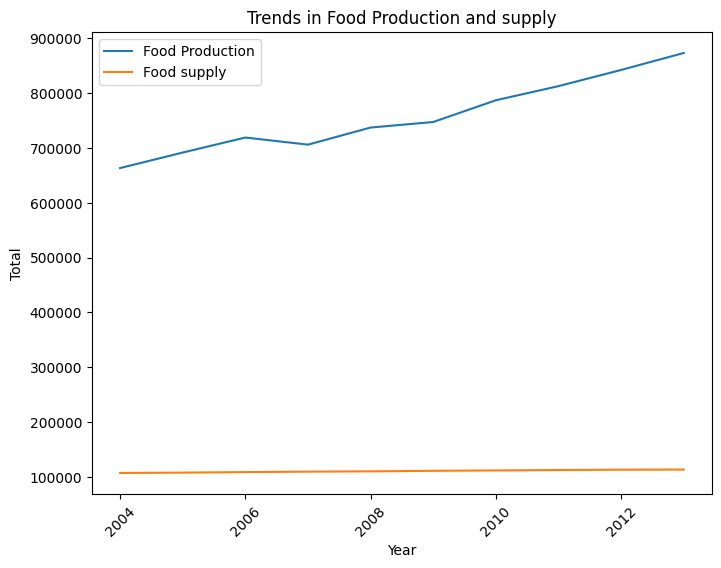

<Figure size 800x600 with 0 Axes>

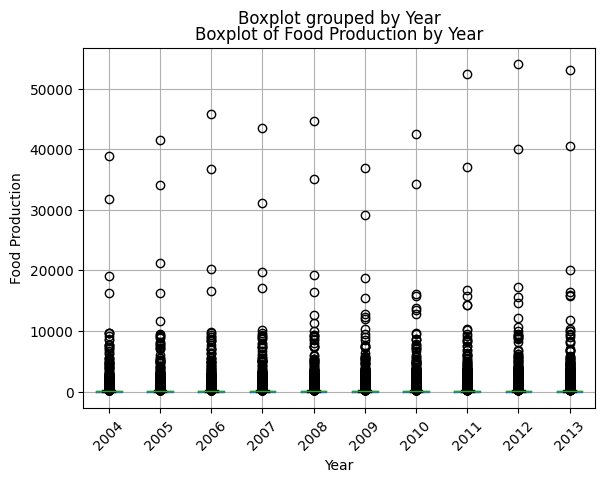

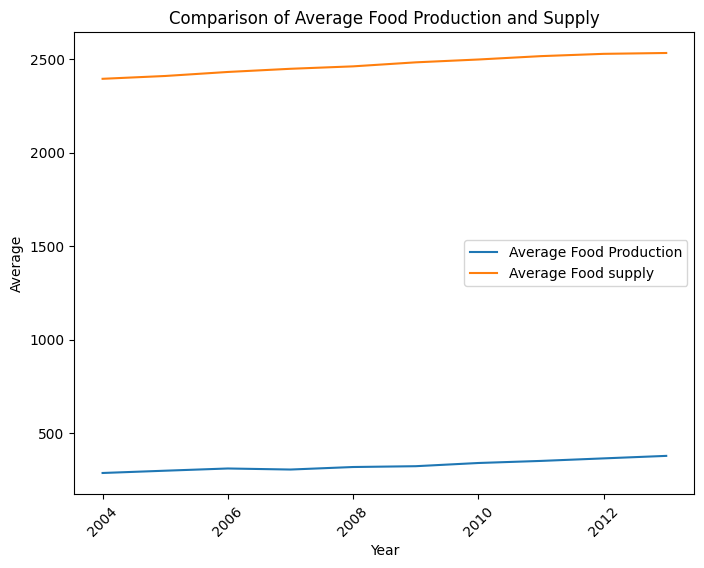

In [ ]:
# Trends in food production and supply over the years
production_by_year = food_prod.groupby('Year')['Value'].sum()
supply_by_year = food_supply.groupby('Year')['Value'].sum()

plt.figure(figsize=(8, 6))
plt.plot(production_by_year.index, production_by_year.values, label='Food Production')
plt.plot(supply_by_year.index, supply_by_year.values, label='Food supply')
plt.title('Trends in Food Production and supply')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Average and median food production, outliers, quartile, and interquartile ranges
plt.figure(figsize=(8, 6))
food_prod.boxplot(column='Value', by='Year')
plt.title('Boxplot of Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Food Production')
plt.xticks(rotation=45)
plt.show()

# Comparison of average food production and supply for each year
average_production_by_year = food_prod.groupby('Year')['Value'].mean()
average_supply_by_year = food_supply.groupby('Year')['Value'].mean()

plt.figure(figsize=(8, 6))
plt.plot(average_production_by_year.index, average_production_by_year.values, label='Average Food Production')
plt.plot(average_supply_by_year.index, average_supply_by_year.values, label='Average Food supply')
plt.title('Comparison of Average Food Production and Supply')
plt.xlabel('Year')
plt.ylabel('Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Average food production and supply
avg_prod = food_prod.groupby('Year')['Value'].mean()
avg_supply = food_supply.groupby('Year')['Value'].mean()

avg_prod = pd.DataFrame(avg_prod)
avg_supply = pd.DataFrame(avg_supply)

In [ ]:
avg_df = avg_prod.merge(avg_supply, on='Year')
avg_df

,Value_x,Value_y
Year,,
2004,286.767301,2394.222222
2005,298.986592,2409.288889
2006,310.814014,2430.800000
2007,305.215830,2447.755556
2008,318.686851,2460.755556
2009,323.040657,2482.222222
2010,340.166955,2497.400000
2011,351.303633,2515.422222
2012,364.831816,2527.644444


In [ ]:
avg_df.rename(columns={'Value_x':'avg_prod', 'Value_y':'avg_supply'}, inplace=True)

To gain additional insights into the data, we will conduct trend analysis, comparison analysis, and correlation analysis. These analyses will help us understand the patterns, variations, and relationships within the dataset.

## 1. Trend Analysis

To analyze the trend of average production and average supply over the years, you can plot line graphs using matplotlib or seaborn.

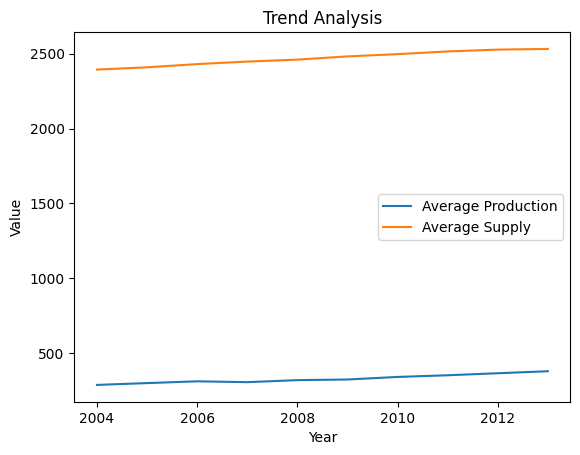

In [ ]:
plt.plot(avg_df.index, avg_df['avg_prod'], label='Average Production')
plt.plot(avg_df.index, avg_df['avg_supply'], label='Average Supply')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trend Analysis')
plt.legend()
plt.show()

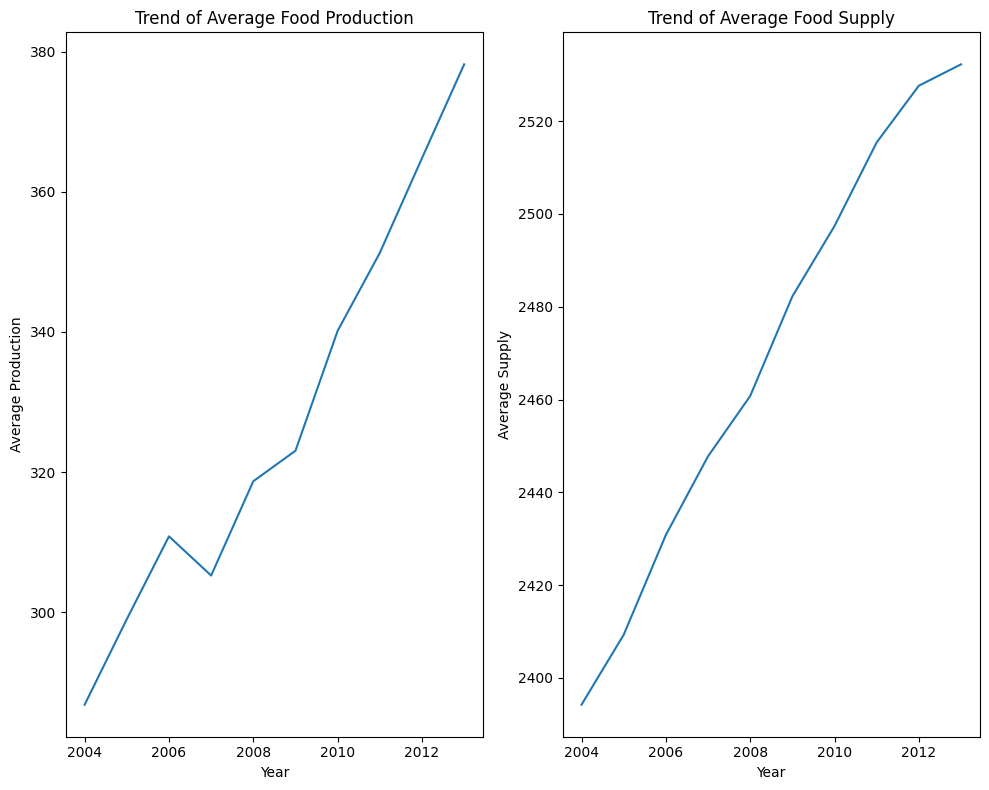

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# Plotting average food production over time
ax1.plot(avg_df.index, avg_df['avg_prod'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Production')
ax1.set_title('Trend of Average Food Production')

# Plotting average food supply over time
ax2.plot(avg_df.index, avg_df['avg_supply'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Supply')
ax2.set_title('Trend of Average Food Supply')

plt.tight_layout()
plt.show()

## 2. Comparsion Analysis

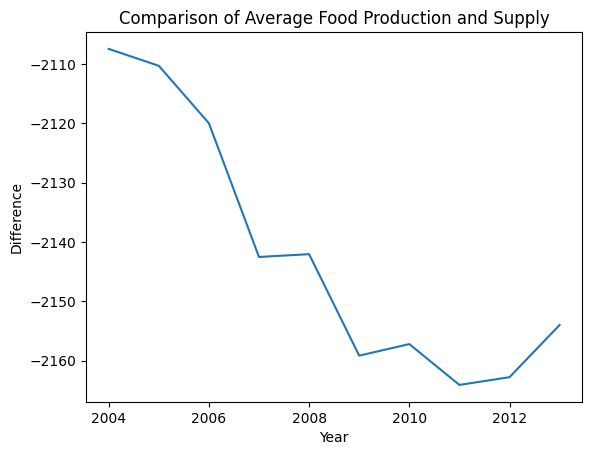

In [ ]:
# Calculate the difference between average food production and supply
avg_df['Difference'] = avg_df['avg_prod'] - avg_df['avg_supply']

# Plotting the difference over time
plt.plot(avg_df.index, avg_df['Difference'])
plt.xlabel('Year')
plt.ylabel('Difference')
plt.title('Comparison of Average Food Production and Supply')
plt.show()

## 3. Correlation between average production and average supply.

In [ ]:
correlation = avg_df['avg_prod'].corr(avg_df['avg_supply'])
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.9640025214458487


## Population data

In [ ]:
# Read population data
df = pd.read_csv('/content/world_population (1960-2022).csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720839314
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987


In [ ]:
# List of African country codes or names
african_country = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'Tanzania', 'Zambia',
       'Zimbabwe']

In [ ]:
# Filter the data for African countries and the desired years
african_df = df[df['Country Name'].isin(african_country)]
filtered_df = african_df[['Country Name'] + [str(year) for year in range(2004, 2014)]]

# Rename the 'Country Name' column to 'Country'
filtered_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# Output the resulting population data
filtered_df.head()

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
4,Angola,18771125,19450959,20162340,20909684,21691522,22507674,23364185,24259111,25188292,26147002
18,Benin,7894554,8149419,8402631,8647761,8906469,9172514,9445710,9726380,10014078,10308730
19,Burkina Faso,13445977,13876127,14316242,14757074,15197915,15650022,16116845,16602651,17113732,17636408
33,Botswana,1859085,1892807,1928704,1966977,2007320,2048997,2091664,2134037,2175425,2217278
34,Central African Republic,4115138,4208834,4294352,4375569,4467233,4564540,4660067,4732022,4773306,4802428


In [ ]:
filtered_df.to_csv('african_population.csv', index=False)

In [ ]:
# Read population data
population = pd.read_csv('/content/african_population.csv')

In [ ]:
# Filter the data for the years 2004 to 2013
year_columns = [str(year) for year in range(2004, 2014)]
population_subset = population[['Country'] + year_columns]

# Reshape the data to have each year as a separate row
population_subset = population_subset.melt(id_vars='Country', var_name='Year', value_name='Population')

# Convert the 'Year' column to numeric
population_subset['Year'] = pd.to_numeric(population_subset['Year'])

# Sort the data by country and year
population_subset = population_subset.sort_values(['Country', 'Year'])

# Reset the index of the dataframe
population_subset = population_subset.reset_index(drop=True)

In [ ]:
population_subset.head(3)

,Country,Year,Population
0,Algeria,2004,32510186
1,Algeria,2005,32956690
2,Algeria,2006,33435080


In [ ]:
mean_population = population_subset.groupby('Year')['Population'].mean().reset_index()
mean_population

,Year,Population
0,2004,1.781356e+07
1,2005,1.826196e+07
2,2006,1.872627e+07
3,2007,1.920803e+07
4,2008,1.970480e+07
5,2009,2.021424e+07
6,2010,2.073685e+07
7,2011,2.127638e+07
8,2012,2.183000e+07
9,2013,2.239522e+07


In [ ]:
# Create a dataframe of average production and supply and mean population
merged_df = avg_df.merge(mean_population, on='Year')
merged_df

,Year,avg_prod,avg_supply,Difference,Population
0,2004,286.767301,2394.222222,-2107.454921,1.781356e+07
1,2005,298.986592,2409.288889,-2110.302297,1.826196e+07
2,2006,310.814014,2430.800000,-2119.985986,1.872627e+07
3,2007,305.215830,2447.755556,-2142.539725,1.920803e+07
4,2008,318.686851,2460.755556,-2142.068704,1.970480e+07
5,2009,323.040657,2482.222222,-2159.181565,2.021424e+07
6,2010,340.166955,2497.400000,-2157.233045,2.073685e+07
7,2011,351.303633,2515.422222,-2164.118589,2.127638e+07
8,2012,364.831816,2527.644444,-2162.812628,2.183000e+07
9,2013,378.227568,2532.244444,-2154.016876,2.239522e+07


## What is the relationship between average food production and supply on population growth?

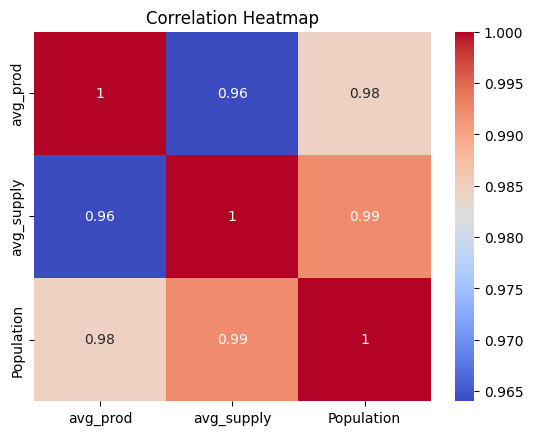

In [ ]:
# Calculate correlation matrix
#correlation_matrix = merged_df[['Average Production', 'Average Supply', 'Variable1', 'Variable2']].corr()
correlation_matrix = merged_df[['avg_prod', 'avg_supply', 'Population']].corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
correlation_matrix

,avg_prod,avg_supply,Population
avg_prod,1.000000,0.964003,0.984417
avg_supply,0.964003,1.000000,0.992259
Population,0.984417,0.992259,1.000000


## References

- https://www.naturalearthdata.com/downloads/110m-physical-vectors/
- https://cartographyvectors.com/map/7-africa
- https://datahub.io/core/geo-countries
- https://data.worldbank.org/indicator/SP.POP.TOTL

For a better view, use [nbviewer](https://nbviewer.org/github/).